In [145]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linprog
import random

In [146]:
def extractObjective(objective, minimize):
    C = []
    a, add, b = objective.split()
    a = int(a[:-1])
    b = int(b[:-1])

    if minimize:
        C.append([a, b])
    else:
        C.append([-a, -b])
    return C
    
def extractConstraints(constraints):
    # Constraints
    A = []
    B = []

    for constraint in constraints:
        # parse the constraint string to extract the coefficients and constant
        # assuming the format is "ax + by >= c"
        a, add, b, op, c = constraint.split()

        a = int(a[:-1])
        b = int(b[:-1])
        c = int(c)
        if op == ">=":  # Must meet the minimum of
            A.append([-a, -b])
            B.append(-c)
        elif op == "<=":
            A.append([a, b])  # Must not exceed
            B.append(c)
    return A,B
    


In [147]:
def LPSSolver2d(objective, constraints, minimize=True):
    # Objective Functions: Function we wish to maximize or minimize

    C = extractObjective(objective, minimize)

    # Constraints
    A, B = extractConstraints(constraints)

    x0_bounds = (0, None)
    x1_bounds = (0, None)

    res = linprog(C[0], A_ub=A, b_ub=B, bounds=[x0_bounds, x1_bounds])

    print(f"x: {res.x[0]}, y: {res.x[1]}")
    x_min = float('inf')
    x_max = float('-inf')
    y_min = float('inf')
    y_max = float('-inf')

    for i in range(len(A)):
        a = A[i][0]
        b = A[i][1]
        c = B[i]
        if a != 0:
            x_max = max(x_max, c / a)
        if b != 0:
            y_max = max(y_max, c / b)

    max_val = max(x_max, y_max)

    x = np.linspace(0, max_val, 100)
    cmap = plt.get_cmap('tab10')
    colors = [cmap(i) for i in range(cmap.N)]

    for i in range(len(A)):
        a = A[i][0]
        b = A[i][1]
        c = B[i]
        y = (c - a * x) / b
        color = colors[i % len(colors)]
        plt.plot(x, y, color=color)
        plt.fill_between(x, y, max_val, color=color, alpha=0.5)
        x_min = min(x_min, min(x))
        x_max = max(x_max, max(x))
        y_min = min(y_min, min(y))
        y_max = max(y_max, max(y))

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.plot(res.x[0], res.x[1], 'ro')
    plt.show()

x: 3.0, y: 6.0


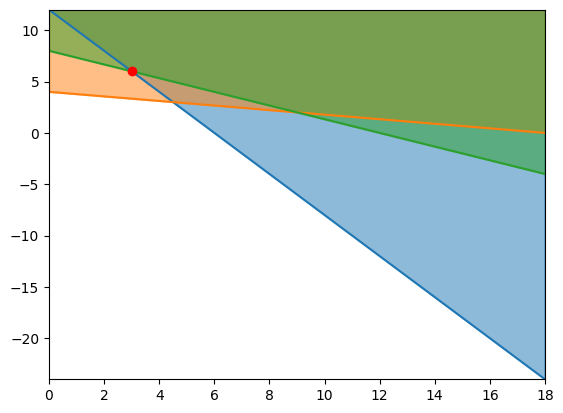

In [148]:
objective = "25x + 20y"

constraints = ["2x + 1y >= 12", "2x + 9y >= 36", "2x + 3y >= 24 "]
LPSSolver2d(objective, constraints, True)

x: 200.0, y: 49.99999999999999


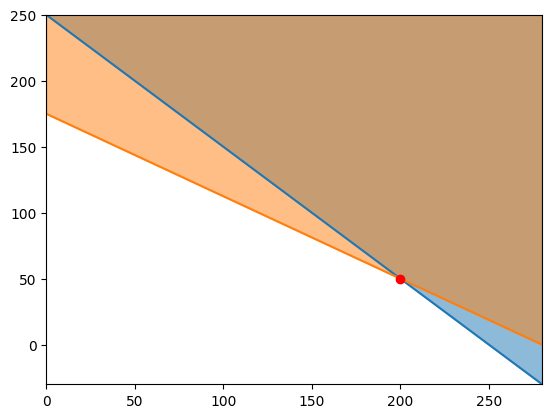

In [149]:
objective = "45a + 50b"

constraints = ["1a + 1b <= 250", "250a + 400b <= 70000"]

LPSSolver2d(objective, constraints, False)


In [150]:
import pulp

# Define the problem
problem = pulp.LpProblem('LP Problem', pulp.LpMaximize)

# Define the decision variables
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)
# Define the objective function
problem += 45*x + 50*y

# Define the constraints
problem += x + y <= 250
problem += 250*x + 400*y <= 70,000

# Solve the problem
status = problem.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[status])

# Print the optimal values of the decision variables and objective function
print("x =", pulp.value(x))
print("y =", pulp.value(y))
print("Objective =", pulp.value(problem.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/40ad4aff022e42a3a6bc18a5a6fb59cc-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/40ad4aff022e42a3a6bc18a5a6fb59cc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 14 RHS
At line 17 BOUNDS
At line 18 ENDATA
Problem MODEL has 2 rows, 2 columns and 4 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
0  Obj -0 Dual inf 95 (2)
0  Obj -0 Dual inf 95 (2)
2  Obj 12.6
Optimal - objective value 12.6
Optimal objective 12.6 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.

In [151]:
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    res = linprog(C, A_ub=A, b_ub=B, bounds=[x0_bounds, x1_bounds])

    print(f"x: {res.x[0]}, y: {res.x[1]}")

x: 3.0, y: 6.0


In [152]:
import pulp

# Define the problem
problem = pulp.LpProblem('LP Problem', pulp.LpMinimize)

# Define the decision variables
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

# Define the objective function
problem += 25*x + 20*y

# Define the constraints
problem += 2*x + 1*y >= 12
problem += 2*x + 9*y >= 36
problem += 2*x + 3*y >= 24

# Solve the problem
status = problem.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[status])

# Print the optimal values of the decision variables and objective function
print("x =", pulp.value(x))
print("y =", pulp.value(y))
print("Objective =", pulp.value(problem.objective))

Status:Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/c5e12bf40ba744038765a8da86de3e45-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/c5e12bf40ba744038765a8da86de3e45-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 17 RHS
At line 21 BOUNDS
At line 22 ENDATA
Problem MODEL has 3 rows, 2 columns and 6 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
0  Obj 0 Primal inf 18 (3)
2  Obj 195
Optimal - objective value 195
Optimal objective 195 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):

In [153]:
import pulp

# Define the problem
problem = pulp.LpProblem('LP Problem', pulp.LpMinimize)

# Define the decision variables
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)
# objective = "15x + 3y"

# constraints = ["60x + 15y ≤ 600", "60x ≤ 0.9 * 600"]

# Define the objective function
problem += 15*x + 3*y

# Define the constraints
problem += 60*x + 15*y <= 600
problem += 60*x <= 0.9*600

# Solve the problem
status = problem.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[status])

# Print the optimal values of the decision variables and objective function
print("x =", pulp.value(x))
print("y =", pulp.value(y))
print("Objective =", pulp.value(problem.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/7135dd51e4fb4775bb0cf29969925ea0-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/7135dd51e4fb4775bb0cf29969925ea0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 13 RHS
At line 16 BOUNDS
At line 17 ENDATA
Problem MODEL has 2 rows, 2 columns and 3 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-3) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 0
After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 0 - 0 iterations time 0.002, Presolve 0.00
Option for printingOpt

In [155]:
import pulp

# Define the problem
problem = pulp.LpProblem('LP Problem', pulp.LpMaximize)

# Define the decision variables
x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)
z = pulp.LpVariable('z', lowBound=0)


# Define the objective function
problem += 45*x + 50*y + 55*z

# Define the constraints
problem += 2*x + 2.5*y + 3*z <= 4006
problem += 1.5*x + 2*y + 1*z <= 2495
problem += 1*x + 0.75*y + 1.25*z <= 1500

# Solve the problem
status = problem.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[status])

# Print the optimal values of the decision variables and objective function
print("x =", pulp.value(x))
print("y =", pulp.value(y))
print("z =", pulp.value(z))

print("Objective =", pulp.value(problem.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/592d46c056704f61af79096c7084e00b-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/yn/4nkcf4bx0tl9zps6_x1krghm0000gn/T/592d46c056704f61af79096c7084e00b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 21 RHS
At line 25 BOUNDS
At line 26 ENDATA
Problem MODEL has 3 rows, 3 columns and 9 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (0) rows, 3 (0) columns and 9 (0) elements
0  Obj -0 Dual inf 161.25 (3)
0  Obj -0 Dual inf 161.25 (3)
3  Obj 79310
Optimal - objective value 79310
Optimal objective 79310 - 3 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds

/Users/lorenzomendoza/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
